In [3]:
import pandas as pd
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
with open('Bakery.csv', 'r') as file:
    transactions = [line.strip().split(',') for line in file if line.strip()]

# Build item to transaction mapping
item_to_transactions = defaultdict(set)
for tid, transaction in enumerate(transactions):
    for item in transaction:
        item_to_transactions[item.strip()].add(tid)

# Function to find support of itemsets
def find_support(itemsets, item_to_transactions):
    support_counts = {}
    for itemset in itemsets:
        # Intersect transaction sets for all items in the itemset
        common_transactions = set.intersection(*(item_to_transactions[item] for item in itemset))
        support_counts[frozenset(itemset)] = len(common_transactions)
    return support_counts

In [4]:
# Step 2: Apply ECLAT Algorithm
min_support_percentage = 0.30  # Set a minimum support threshold of 30%
min_support = int(min_support_percentage * len(transactions))

# Start with single items
frequent_itemsets = {}
current_itemsets = [{item} for item in item_to_transactions]

while current_itemsets:
    support_counts = find_support(current_itemsets, item_to_transactions)
    # Filter itemsets meeting the minimum support
    current_itemsets = [itemset for itemset in support_counts if support_counts[itemset] >= min_support]
    frequent_itemsets.update({tuple(sorted(itemset)): support_counts[itemset] for itemset in current_itemsets})

    # Generate next level itemsets
    current_itemsets = [set(a).union(set(b)) for a, b in combinations(current_itemsets, 2) if len(set(a).union(set(b))) == len(a) + 1]
    current_itemsets = list(map(frozenset, set(map(tuple, current_itemsets))))  # Remove duplicates

In [5]:
# Step 3: Display Frequent Itemsets
frequent_itemsets_df = pd.DataFrame([(itemset, support) for itemset, support in frequent_itemsets.items()], 
                                    columns=['Itemset', 'Support'])

print("Frequent Itemsets:")
print(frequent_itemsets_df)

Frequent Itemsets:
                Itemset  Support
0            (Morning,)     8404
1            (Weekend,)     7700
2          (Afternoon,)    11569
3            (Weekday,)    12807
4  (Afternoon, Weekday)     7273


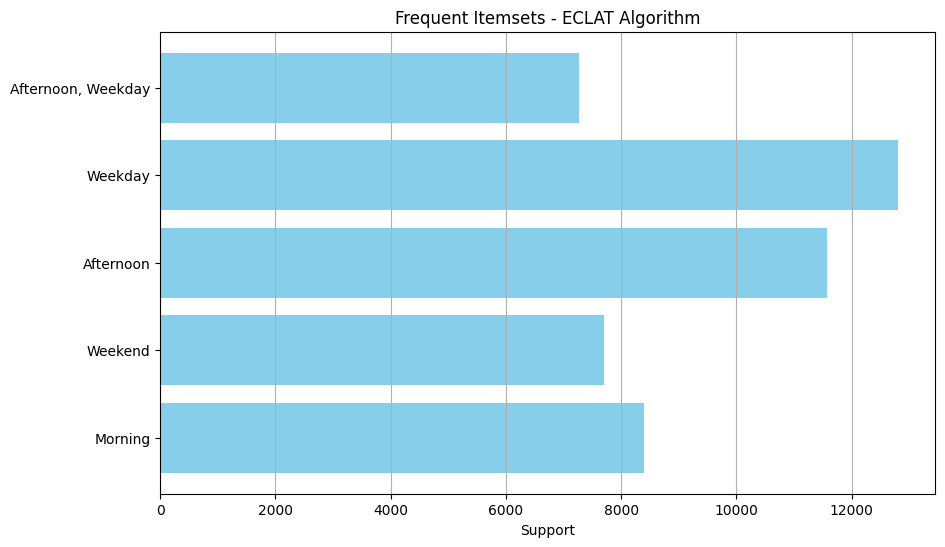

In [6]:
# Step 4: Visualize the Frequent Itemsets
plt.figure(figsize=(10, 6))
plt.barh(
    [', '.join(itemset) for itemset in frequent_itemsets_df['Itemset']], 
    frequent_itemsets_df['Support'], 
    color='skyblue'
)
plt.xlabel('Support')
plt.title('Frequent Itemsets - ECLAT Algorithm')
plt.grid(axis='x')
plt.show()